### Author: Hasan Hüseyin Gümüştepe

* This project contains using several regression techniques when analysing WHO(World Health Organization)’s life expectancy dataset for each country. In this dataset, WHO data is collected from 193 countries and it includes critical factors that affect life expectancy, for example: education, economy, deaths, healthcare, children safety etc. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/life-expectancy-data/Life Expectancy Data-1.csv


* We start with importing the necessary libraries. 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import seaborn as sns 
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
from sklearn.metrics import roc_auc_score, roc_curve 
import statsmodels.formula.api as smf 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_squared_error, r2_score

* We import the dataset and copy it into other variables that we are going to use in the later steps.


In [3]:
Life_Expectancy_Data = pd.read_csv(r"/kaggle/input/life-expectancy-data/Life Expectancy Data-1.csv")
data = Life_Expectancy_Data
data = data.dropna()
lindata = data 
multidata = data
polydata = data

* We Show the column names and data types of them. 

In [4]:
lindata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio                    

In [5]:
lindata.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


* We have some string values in Country and Status columns. So we need to convert the categorical variables into numerical ones. The status can be ordinal but country names are nominal. So that we need to apply One-Hot Encoding in Country column.

In [6]:
import pandas as pd

lindata = pd.get_dummies(lindata, columns=['Country'], prefix='Country')

* We need to apply label encoding in Status column, but since the Label Encoder assigns numbers randomly, and we need to specify the numbers, we are going to use Replace function. We replaced Developing with 0 and Developed with 1.

In [7]:
lindata['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [8]:
lindata['Status']=lindata['Status'].replace({'Developing':0, 'Developed':1})

/tmp/ipykernel_17/474184615.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lindata['Status']=lindata['Status'].replace({'Developing':0, 'Developed':1})


* This is the last version of the dataset: 

In [9]:
lindata

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,False,False,False,False,False,False,False,False,False,False
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,False,False,False,False,False,False,False,False,False,False
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,False,False,False,False,False,False,False,False,False,False
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,False,False,False,False,False,False,False,False,False,False
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,False,False,False,False,False,False,False,False,False,True
2934,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,False,False,False,False,False,False,False,False,False,True
2935,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,False,False,False,False,False,False,False,False,False,True
2936,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,False,False,False,False,False,False,False,False,False,True


In [10]:
print(lindata.columns)

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ',
       ...
       'Country_Tunisia', 'Country_Turkey', 'Country_Turkmenistan',
       'Country_Uganda', 'Country_Ukraine', 'Country_Uruguay',
       'Country_Uzbekistan', 'Country_Vanuatu', 'Country_Zambia',
       'Country_Zimbabwe'],
      dtype='object', length=154)


* Since we had many columns(154) when we applied one hot encoding to countries, we cannot create a meaningful correlation graph. So that we take a sub dataset with these columns: 

In [11]:
# Sütun isimlerindeki boşlukları temizleyip küçük harfe dönüştürüyoruz
lindata.columns = lindata.columns.str.strip().str.replace(' ', '').str.lower()

# Sütun isimlerini uyumlu olacak şekilde değiştirerek veri seçiyoruz
lindata2 = lindata[['year', 'status', 'adultmortality', 'infantdeaths', 'alcohol', 'percentageexpenditure', 'measles',
                    'bmi', 'under-fivedeaths', 'hiv/aids', 'gdp', 'population', 'thinness1-19years', 
                    'thinness5-9years', 'incomecompositionofresources', 'schooling']]


# Plot the Heatmap

<Axes: >

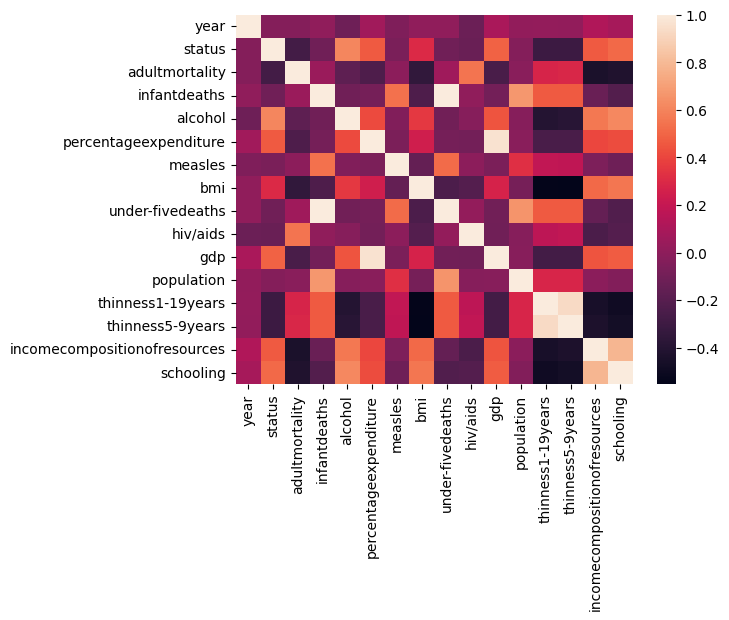

In [12]:
corr = lindata2.corr()
sns.heatmap(corr,
           xticklabels=corr.columns,
           yticklabels=corr.columns)

* **GDP**: GDP, or Gross Domestic Product, is a key indicator of the economic performance of a country. **It represents the total value of all goods and services produced over a specific time period within the borders of a country**. GDP is often used as a comprehensive measure of a nation's overall economic health and is a fundamental metric in economic analysis.

* **Percentage Expenditure**: This indicator **represents the total amount spent on health as a percentage of a country's Gross Domestic Product**. It provides insights into the relative importance of health spending in the overall economy.

Here is the linear regression formula: 

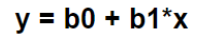

# Linear Regression


* We assigned GDP column to X and percentage expenditure to y, then we split the dataset into training and test sets. 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Sütun adlarını temizleme
lindata.columns = lindata.columns.str.strip().str.replace(' ', '').str.lower()

# Temizlenmiş sütun adları ile veri seçimi
X = lindata[['gdp']]
y = lindata['percentageexpenditure']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* - We build the linear regression model and fit the training sets inside the model. Then the model took the X_test values and predicted the y_test values and stored them in y_pred variable.

In [14]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

* We calculated the error and accuracy rates of the model. R^2 score is for accuracy of the linear regression models and we can say that model predicts around 80% of the y values truly. 

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Calculate MSE, MAE, RMSE and R2 score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 317721.90103291685
Mean Absolute Error (MAE): 246.56374203684524
Root Mean Squared Error (RMSE): 563.6682544129276
R-squared (R2) Score: 0.8153217964374084


* In the plot below, we can see the difference between the real and the predicted values.

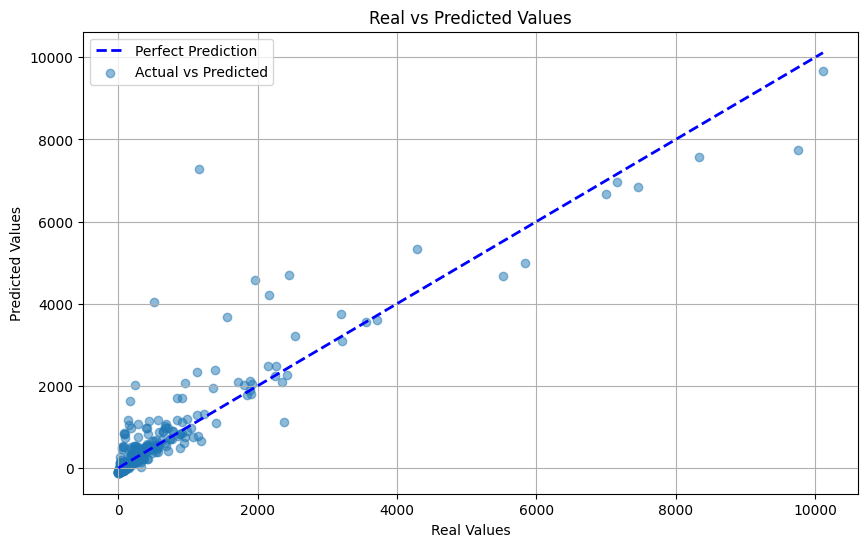

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# We create an array of equally spaced values for the straight line
line_values = np.linspace(y_test.min(), y_test.max(), len(y_test))

plt.figure(figsize=(10, 6))

# We plot the straight line of real values
plt.plot(line_values, line_values, color='blue', linestyle='--', linewidth=2, label='Perfect Prediction')

# We draw a scatter plot for real vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5, label='Actual vs Predicted')

plt.title('Real vs Predicted Values')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Multiple Linear Regression
* In this procedure, we are going to use different independent values to make the model predict one dependent value. 

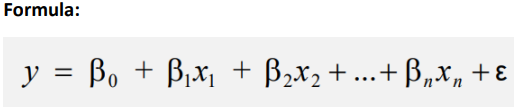

* We are going to drop the columns which are numeric and then we will use each column except ‘percentage expenditure’ and the model will predict percentage expenditure values. 

In [17]:
Life_Expectancy_Data = pd.read_csv(r"/kaggle/input/life-expectancy-data/Life Expectancy Data-1.csv") 
data = Life_Expectancy_Data.copy()
data = data.dropna()

multidata = data.copy()
multidata.drop(["Country", "Status"], axis=1, inplace=True)

x = multidata.drop('percentage expenditure', axis=1)
y = multidata["percentage expenditure"]

* Before splitting the dataset into training and test sets, let’s scale the data so that every attribute is represented in the same scale, which increase interpretability of the model. 

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
c = scaler.fit_transform(x)

* We split the dataset into training and test sets, we create the model, fit the training data in it and we get intercept and coefficient values.

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42) 
lm = LinearRegression()
model = lm.fit(x_train,y_train)

print("b0: ", lm.intercept_)
print("b1,b2,b3...", lm.coef_)

b0:  15289.357586508639
b1,b2,b3... [-7.68540177e+00  6.55582363e+00 -3.65960802e-02 -1.02785639e+00
  4.84313796e+00 -1.44452239e+00 -6.34805615e-04 -3.02001406e-01
  6.81953276e-01 -8.93856608e-01  2.01651171e+01  6.38929623e-01
  2.51291059e+00  1.50819517e-01  2.17070436e-07 -7.03947380e-01
  2.32988542e+00 -1.46097043e+02 -2.87355253e+01]


* We load the x_test values to the model and let it predict the y_test values. Then we compare the results. 

In [20]:
y_head = model.predict(x_test)
y_head[0:5]

array([ 118.6066982 ,  562.26133738, 4875.53258371,  -17.63074349,
         17.39918068])

In [21]:
y_test_1 = np.array(range(0,len(y_test)))

r2 score=  0.8149543168570788


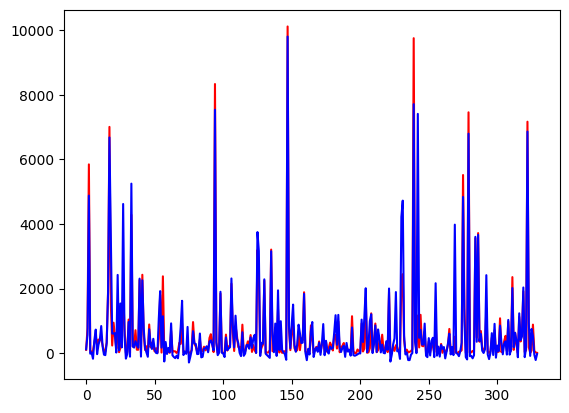

In [22]:
# r2 value:
r2_degeri = r2_score(y_test, y_head)
print("r2 score= ",r2_degeri)

plt.plot(y_test_1, y_test, color="r")
plt.plot(y_test_1, y_head, color="blue")
plt.show()

In [23]:
rmse = np.sqrt(mean_squared_error(y_test, y_head))
rmse

564.2287797752967